In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'/Users/roxanamiu/20.03.2024_Instacart_Basket_Analysis'
ords_products_combined=pd.read_pickle(r'/Users/roxanamiu/20.03.2024_Instacart_Basket_Analysis/2.Data/Prepared_Data/ords_customers_combined.pkl')

In [3]:
ords_products_combined.shape

(32404859, 18)

In [4]:
ords_products_combined.dtypes

order_id                   object
user_id                    object
order_number               object
orders_day_of_week          int64
hour_of_order               int64
days_since_prior_order    float64
product_id                  int64
product_name               object
department_id               int64
prices                    float64
loyalty_flag               object
type_of_spender            object
frequency_flag             object
state                      object
age                         int64
number_dependants           int64
fam_status                 object
income                      int64
dtype: object

In [5]:
ords_products_combined.head()

order_id user_id order_number  orders_day_of_week  hour_of_order  \
0  2539329       1            1                   2              8   
1  2398795       1            2                   3              7   
2   473747       1            3                   3             12   
3  2254736       1            4                   4              7   
4   431534       1            5                   4             15   

   days_since_prior_order  product_id product_name  department_id  prices  \
0                     NaN         196         Soda              7     9.0   
1                    15.0         196         Soda              7     9.0   
2                    21.0         196         Soda              7     9.0   
3                    29.0         196         Soda              7     9.0   
4                    28.0         196         Soda              7     9.0   

   loyalty_flag type_of_spender         frequency_flag    state  age  \
0  New customer     Low spender  Non-frequent customer  Alabama   31   
1  New customer     Low spender  Non-frequent customer  Alabama   31   
2  New customer     Low spender  Non-frequent customer  Alabama   31   
3  New customer     Low spender  Non-frequent customer  Alabama   31   
4  New customer     Low spender  Non-frequent customer  Alabama   31   

   number_dependants fam_status  income  
0                  3    married   40423  
1                  3    married   40423  
2                  3    married   40423  
3                  3    married   40423  
4                  3    married   40423

In [6]:
ords_products_combined.loc[ords_products_combined['prices'] >100, 'prices'] = np.nan

In [7]:
ords_products_combined['prices'].max()

25.0

In [8]:
#creating a sample of the subset

In [9]:
np.random.seed(4)

In [10]:
dev = np.random.rand(len(ords_products_combined)) <= 0.7

In [11]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [12]:
big = ords_products_combined[dev]

In [13]:
small=ords_products_combined[~dev]

In [14]:
len(ords_products_combined)

32404859

In [15]:
#checking the size of the sample
len(small)+len(big)

32404859

In [16]:
#create a bar chart, a histogram, a scatterplot and a line chart for the sample you created

In [17]:
#bar chart

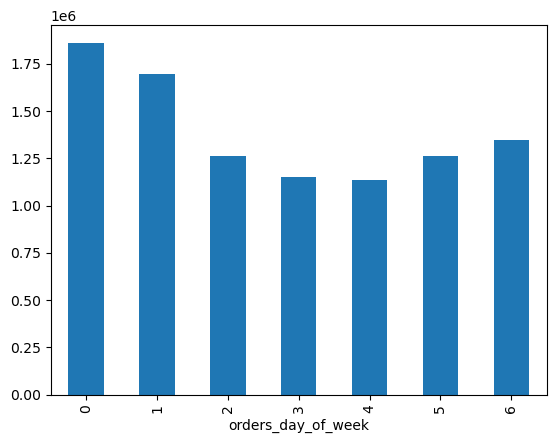

In [19]:
vuzualisation_33=small['orders_day_of_week'].value_counts().sort_index().plot.bar()

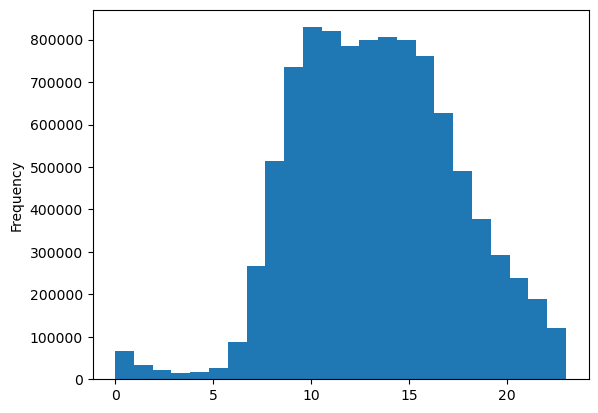

In [20]:
#histogram
visualization_3=small['hour_of_order'].plot.hist(bins = 24)

# I made a histogram with 24 bins because the day has 24 hours. Assuming each day contains different buying behaviour, I wanted to have enough bins so the information to be properly sorted. We notice that between 10 and 15, most of the orders are made.

In [21]:
#saving the vizualisation
visualization_3.figure.savefig(os.path.join(path, '4.Analysis','Visualizations', 'histogram_hour_of_order.png'))

In [27]:
#saving the vizualisation
vuzualisation_33.figure.savefig(os.path.join(path, '4.Analysis','Visualizations', 'barchart_day_of_order.png'))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


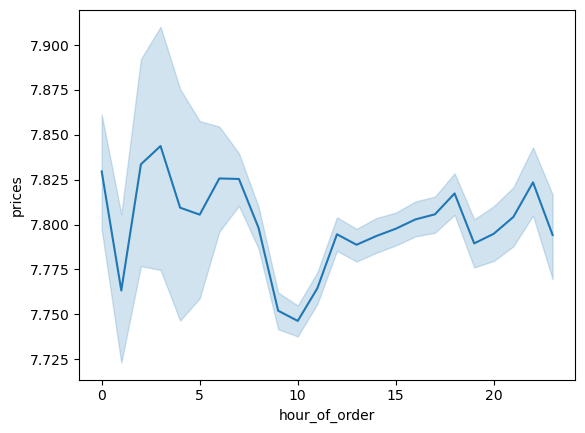

In [28]:
line= sns.lineplot(data = small, x = 'hour_of_order',y = 'prices')

In [29]:
ords_products_combined.loc[ords_products_combined['prices'] > 100]

Empty DataFrame
Columns: [order_id, user_id, order_number, orders_day_of_week, hour_of_order, days_since_prior_order, product_id, product_name, department_id, prices, loyalty_flag, type_of_spender, frequency_flag, state, age, number_dependants, fam_status, income]
Index: []

<Axes: xlabel='prices', ylabel='prices'>

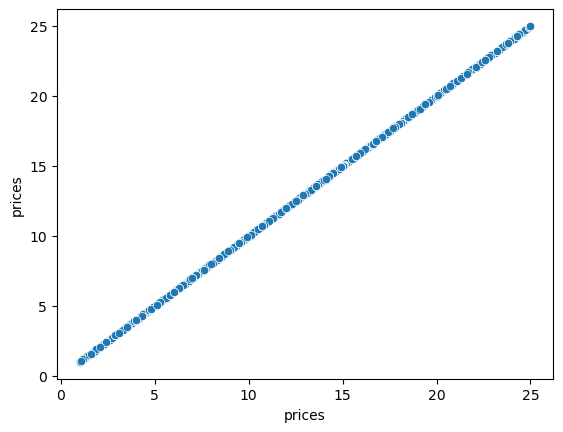

In [30]:
#doing a scatterplot for the prices; after eliminating the outliers, the prices distribution looks normal for the sample
sns.scatterplot(x = 'prices', y = 'prices',data = small)

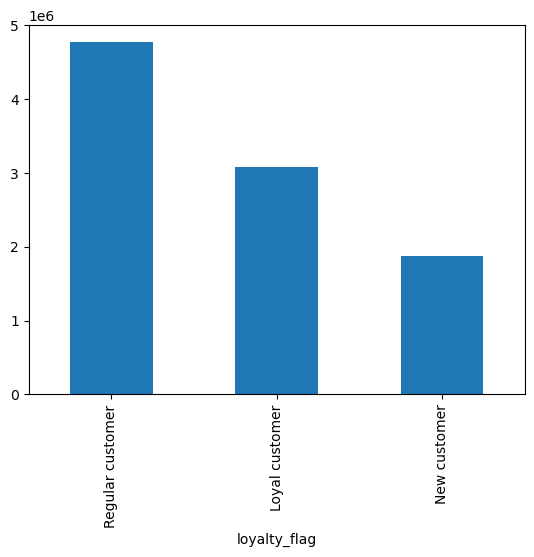

In [31]:
vizualisation_4=small['loyalty_flag'].value_counts().plot.bar()

In [32]:
#saving the vizualisation
vizualisation_4.figure.savefig(os.path.join(path, '4.Analysis','Visualizations', 'barchart_loyalty_flag.png'))

In [33]:
df_5 = small[['hour_of_order','prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


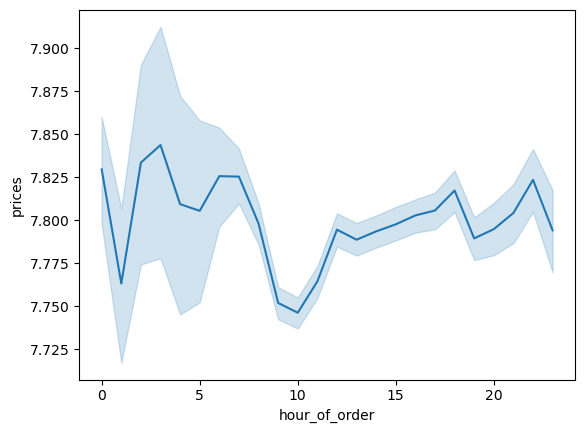

In [34]:
vizualisation_5= sns.lineplot(data = df_5, x = 'hour_of_order',y = 'prices')

# Not coincidentally, the prices are dropping before 10, theat is the moment when the number of orders increases

In [35]:
#saving the vizualisation
vizualisation_5.figure.savefig(os.path.join(path, '4.Analysis','Visualizations', 'barchart_prices_hour_of_order.png'))

In [36]:
df_6=big[['age','number_dependants']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


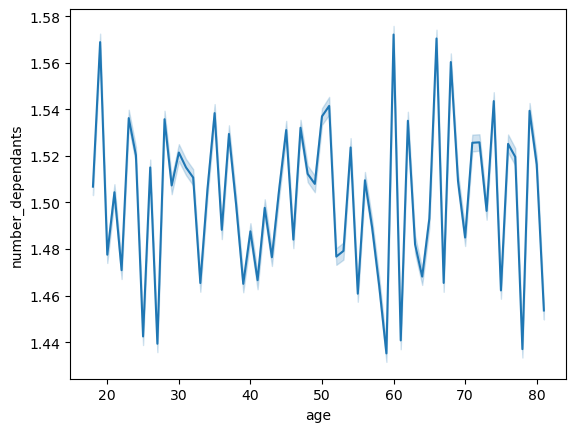

In [37]:
vizualisation_6= sns.lineplot(data = df_6, x = 'age',y = 'number_dependants')

# the linechart doesn t seem to show any connection between the age and the number of dependents

In [38]:
#saving the vizualisation
vizualisation_6.figure.savefig(os.path.join(path, '4.Analysis','Visualizations', 'linechart_age_dependants.png'))

In [39]:
#using scatterplot to see if there is any connection between age and income

In [40]:
df_7=small[['age','income']]

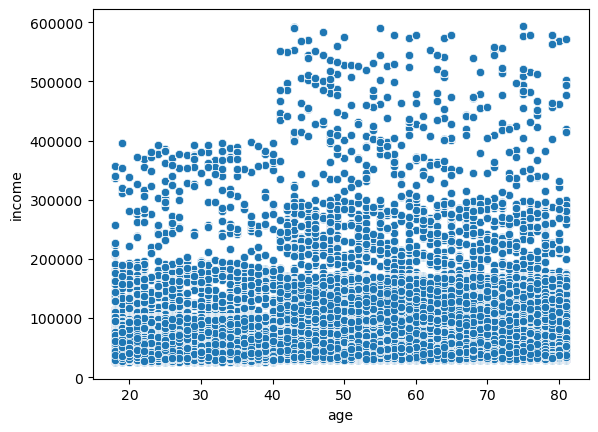

In [41]:
vizualisation_7=sns.scatterplot(x = 'age', y = 'income',data = df_7)

In [42]:
#saving the vizualisation
vizualisation_7.figure.savefig(os.path.join(path, '4.Analysis','Visualizations', 'scatterplot_age_income.png'))

# it looks like between 20 and 40 years, the income is limited to 400k,with concentratiom between 0 and 200k; after 40, the distribution changes, we do have an important part in the income segment 200-300k, and the exceptions over 400k